In [1]:
# 1 design model(input size, output size,forward pass)
# 2 construct loss and optimizer
# 3 training loop
# -forward pass:  compute prediction and loss
# - backward pass: gradients
# - update weights

In [2]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
#step 0: prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

In [11]:
# we will reshape out vector, here it has one row, but we want to reshape it to make a column vector
y=y.view(y.shape[0],1)
print(y.shape)
print(x.shape)

torch.Size([100, 1])
torch.Size([100, 1])


In [13]:
n_sample,n_features=x.shape
print(n_sample,n_features)

100 1


In [14]:
#1 model
input_size=n_features
output_size=1
model=nn.Linear(input_size, output_size)

In [18]:
#2 loss and optimizer
criterion =nn.MSELoss()
learning_rate =0.01
optimizer =torch.optim.SGD(model.parameters(),lr=learning_rate)

In [19]:
# training loop
epochs=100
for epoch in range(epochs):

    #forward pass
    y_predicted=model(x)
    loss=criterion(y_predicted,y)

    # backward pass
    loss.backward() # this will do the back propogation and calculate our gradients

    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch : {epoch+1}, loss : {loss.item():.4f}')

epoch : 10, loss : 4448.5405
epoch : 20, loss : 3319.8716
epoch : 30, loss : 2502.5134
epoch : 40, loss : 1910.0060
epoch : 50, loss : 1480.0945
epoch : 60, loss : 1167.8928
epoch : 70, loss : 940.9929
epoch : 80, loss : 775.9679
epoch : 90, loss : 655.8645
epoch : 100, loss : 568.4012


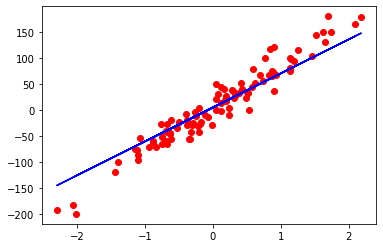

In [20]:
# we need detach, because we want to prevent this from being tracked in our computationl graph
# and then we need to plot it, so we convert it to numpy form
predicted=model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()